## Name : Sangamesh
## Mail id : sangupatil648@gmail.com

## Assignmnet-Neural Networks-Forestfires data

In [3]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 266.3/266.3 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 177.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

import warnings 
warnings.filterwarnings("ignore")

In [2]:
forest = pd.read_csv("forestfires (1).csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest.shape

(517, 31)

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
forest1 = forest.drop_duplicates()

In [9]:
forest1.shape

(509, 31)

In [10]:
forest2 = forest1.drop(forest1.columns[10:30], axis = 1)
forest2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest2["size_category"] = label_encoder.fit_transform(forest2["size_category"])

In [12]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [13]:
forest2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
forest2.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace = True)

In [14]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


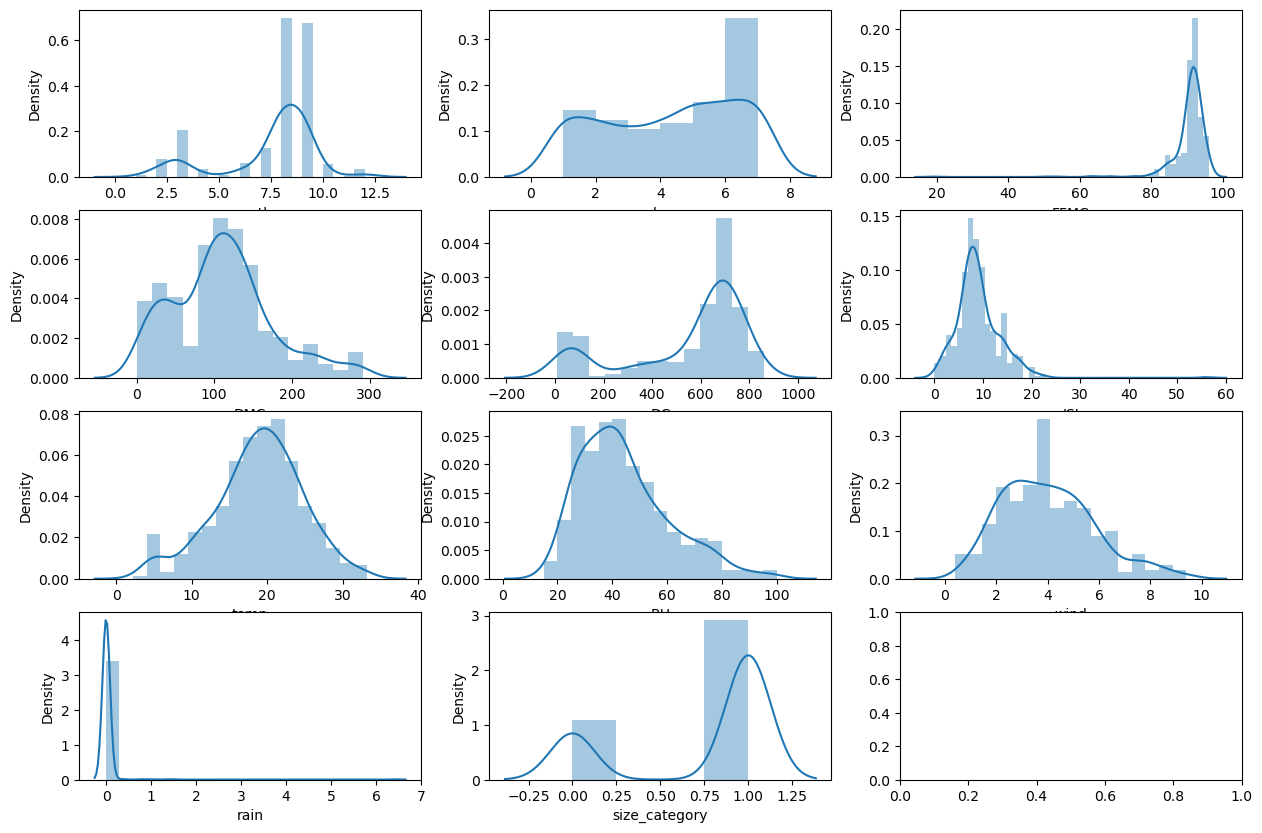

In [15]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(forest2.month, ax=ax[0,0])
sns.distplot(forest2.day, ax=ax[0,1])
sns.distplot(forest2.FFMC, ax=ax[0,2])
sns.distplot(forest2.DMC, ax=ax[1,0])
sns.distplot(forest2.DC, ax=ax[1,1])
sns.distplot(forest2.ISI, ax=ax[1,2])
sns.distplot(forest2.temp, ax=ax[2,0])
sns.distplot(forest2.RH, ax=ax[2,1])
sns.distplot(forest2.wind, ax=ax[2,2])
sns.distplot(forest2.rain, ax=ax[3,0])
sns.distplot(forest2['size_category'], ax=ax[3,1])


plt.show()

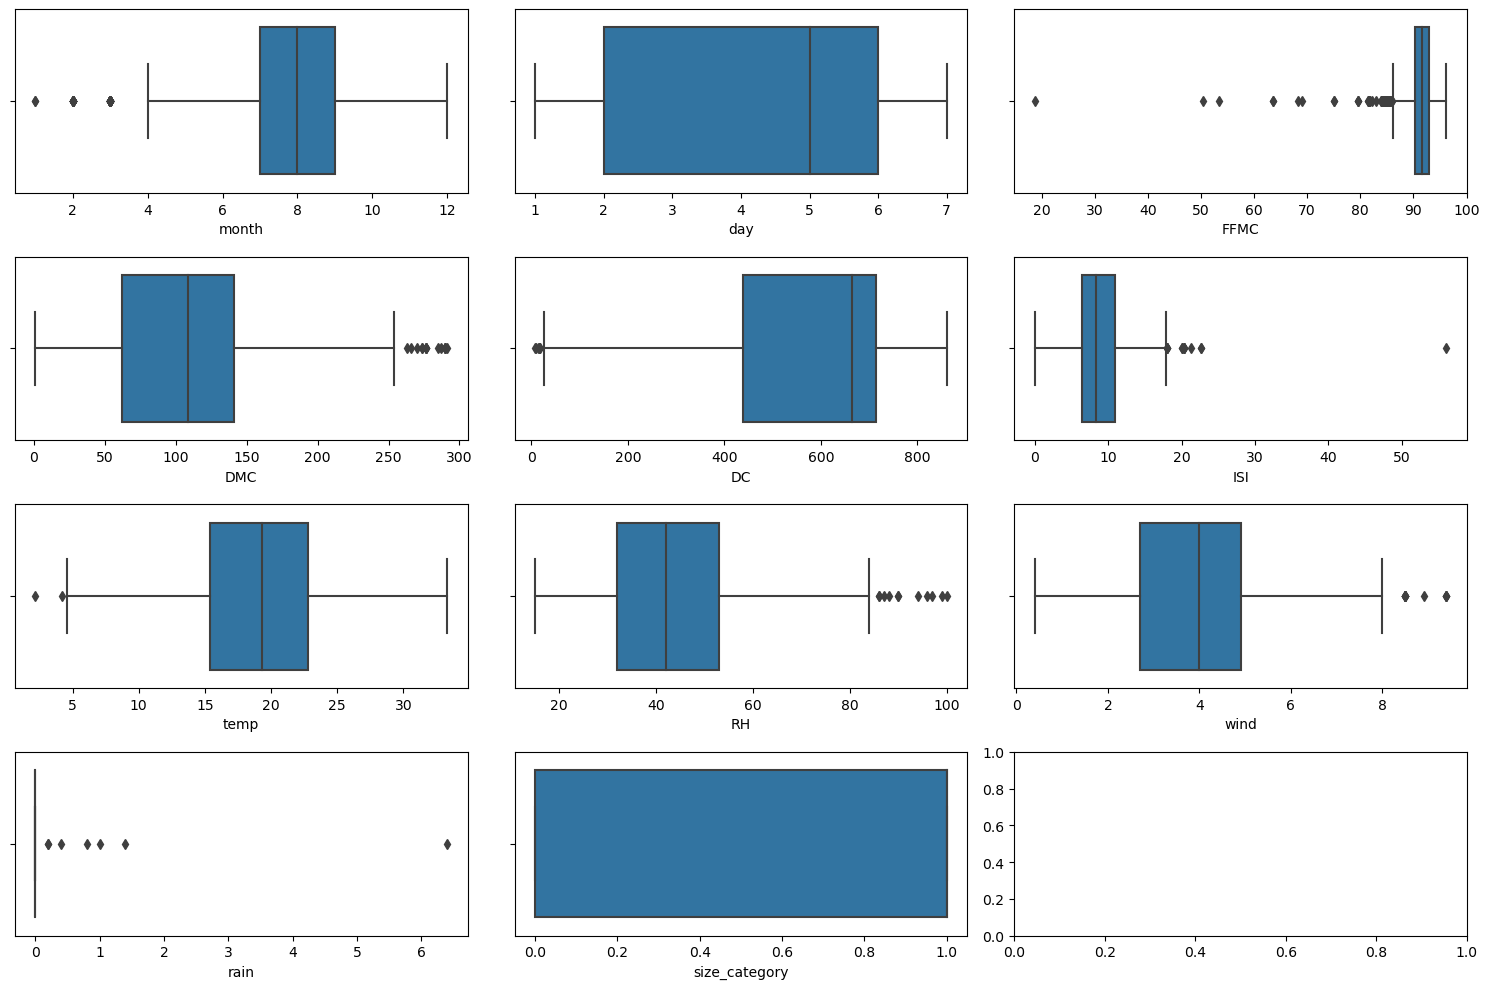

In [16]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(forest2.month, ax=ax[0,0])
sns.boxplot(forest2.day, ax=ax[0,1])
sns.boxplot(forest2.FFMC, ax=ax[0,2])
sns.boxplot(forest2.DMC, ax=ax[1,0])
sns.boxplot(forest2.DC, ax=ax[1,1])
sns.boxplot(forest2.ISI, ax=ax[1,2])
sns.boxplot(forest2.temp, ax=ax[2,0])
sns.boxplot(forest2.RH, ax=ax[2,1])
sns.boxplot(forest2.wind, ax=ax[2,2])
sns.boxplot(forest2.rain, ax=ax[3,0])
sns.boxplot(forest2['size_category'], ax=ax[3,1])

plt.tight_layout()
plt.show()

In [17]:
X = forest2.iloc[:,0:10].values
Y = forest2.iloc[:,-1].values

In [18]:
X

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [19]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
seed = 19
np.random.seed(seed)

In [21]:
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [24]:
model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 3s 26ms/step - loss: 1.1951 - accuracy: 0.4194 - val_loss: 0.8494 - val_accuracy: 0.5893
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 0.7205 - accuracy: 0.6364 - val_loss: 2.2264 - val_accuracy: 0.5952
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 0.7651 - accuracy: 0.6422 - val_loss: 0.7716 - val_accuracy: 0.6012
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 0.6450 - accuracy: 0.6510 - val_loss: 0.7507 - val_accuracy: 0.6071
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6281 - accuracy: 0.6569 - val_loss: 0.8636 - val_accuracy: 0.5952
Epoch 6/100
35/35 [==============================] - 0s 7ms/step - loss: 0.5892 - accuracy: 0.7067 - val_loss: 0.8191 - val_accuracy: 0.6667
Epoch 7/100
35/35 [==============================] - 0s 7ms/step - loss: 0.5881 - accuracy: 0.7507 - val_loss: 0.6767 - val_accuracy: 0.6667
Epoch 8/100


In [25]:
history = model.fit(X,Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 8ms/step - loss: 0.5480 - accuracy: 0.7713 - val_loss: 0.8034 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 0.5439 - accuracy: 0.7713 - val_loss: 0.6833 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 0.5435 - accuracy: 0.7625 - val_loss: 0.6542 - val_accuracy: 0.6667
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.5493 - accuracy: 0.7683 - val_loss: 0.6523 - val_accuracy: 0.6667
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.5580 - accuracy: 0.7713 - val_loss: 0.7789 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 7ms/step - loss: 0.5502 - accuracy: 0.7683 - val_loss: 0.7663 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 7ms/step - loss: 0.5535 - accuracy: 0.7713 - val_loss: 0.7758 - val_accuracy: 0.6726
Epoch 8/100
3

In [26]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

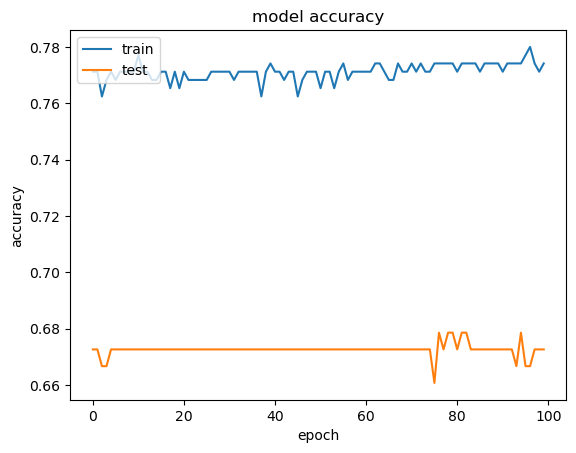

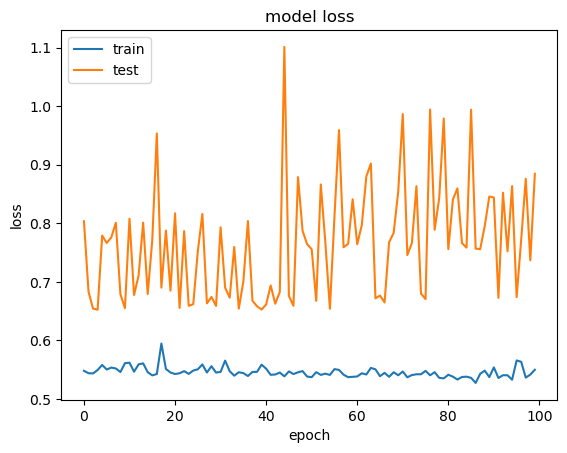

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()